In [ ]:
import numpy as np
import cv2 as cv
from src.lic import *
import os
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
test_img = '../images/hare.png'

In [3]:
img = cv.imread(test_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, tuple(np.array(img.shape[:-1][::-1]) * 2))
img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [4]:
labels, label_counts = label_regions(img_lab, img_lab.shape[0] * img_lab.shape[1] // 8)
vec = extract_region_vector_field(img_gray, labels, label_counts)

In [5]:
im_noise = generate_noise_image(img_gray, labels, label_counts, lambda_1=1, lambda_2=.5)

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


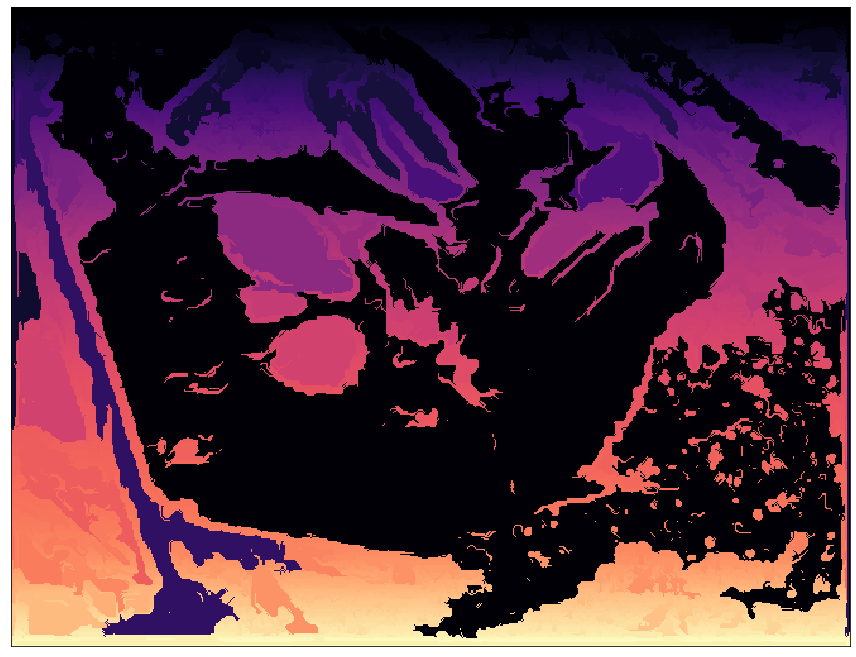

In [6]:
plt.figure(figsize=(12,12))
plt.set_cmap('magma')
plt.imshow(labels)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


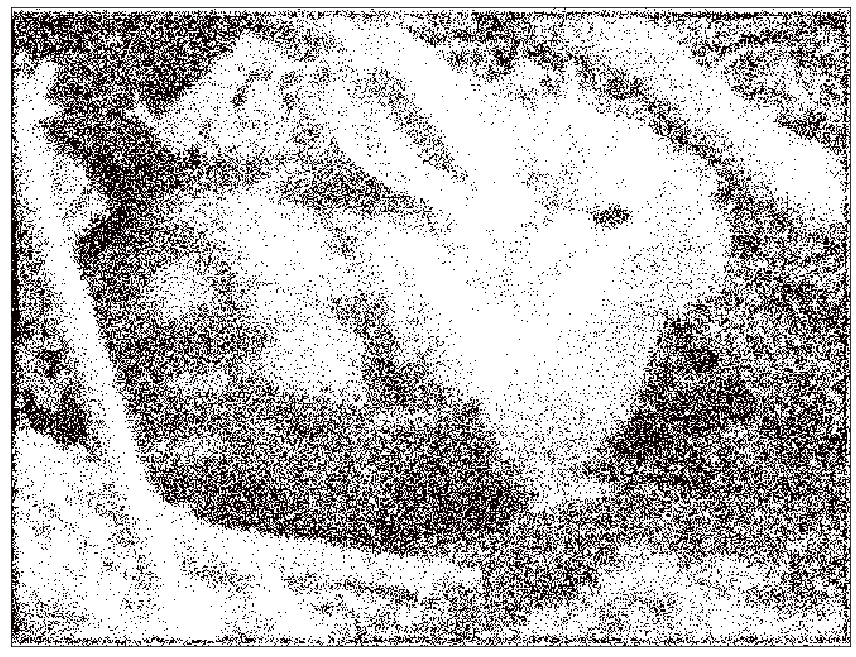

In [7]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('hot')
plt.imshow(im_noise)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.tight_layout()

In [8]:
import matplotlib

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

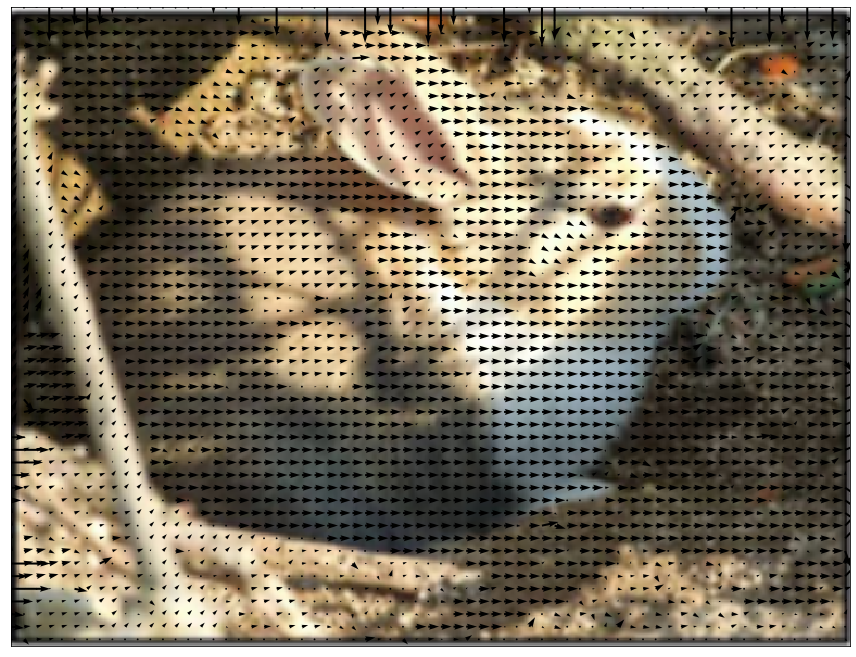

In [9]:
plt.clf()
figure = plt.figure(figsize=(12,12))
# plt.set_cmap(matplotlib.colors.Colormap('Accent'))
# plt.set_cmap('jet')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(img)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
# plt.streamplot(X, Y, vec[:, :, 1], vec[:, :, 0], density=(2, 2))
# plt.streamplot(X, Y, vec_gggg[:, :, 1], vec_gggg[:, :, 0], density=(2, 2))
plt.tight_layout()

In [10]:
import vectorplot as vp

In [11]:
# vp.line_integral_convolution()
u, v = vec[..., 0], vec[..., 1]
u = u.astype(np.float32)
v = v.astype(np.float32)

In [12]:
im_noise_f = im_noise.astype(np.float32)

In [13]:
# Triangular Kernel
KW = 10
kernel = np.arange(KW) + 1
kernel = np.minimum(kernel, kernel[::-1])
kernel = kernel / np.sum(kernel)
kernel = kernel.astype(np.float32)

In [14]:
u.shape, v.shape, im_noise.shape, kernel.shape

((506, 664), (506, 664), (506, 664), (10,))

In [15]:
u.dtype, v.dtype, im_noise_f.dtype, kernel.dtype

(dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'))

In [16]:
data = vp.line_integral_convolution(v, u, im_noise_f, kernel)
# data = vp.line_integral_convolution(v, u, gray1.astype(np.float32), kernel)

In [17]:
# data.shape, lic.shape

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


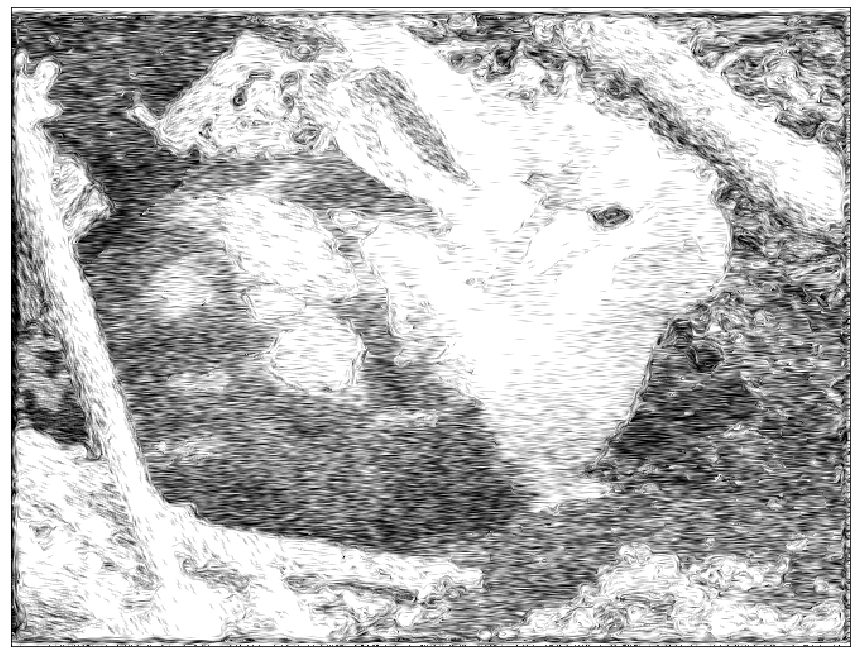

In [18]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('gray')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(data)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
#plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
# plt.streamplot(X, Y, vec[:, :, 1], vec[:, :, 0], density=(2, 2))
plt.tight_layout()

In [19]:
# lic = line_integral_convolution(im_noise, vec, KW=12, use_tqdm=True)

In [20]:
# figure = plt.figure(figsize=(12,12))
# plt.set_cmap('gray')
# plt.imshow(lic)
# plt.axes().get_xaxis().set_visible(False)
# plt.axes().get_yaxis().set_visible(False)
# plt.tight_layout()

In [21]:
import cv2
import numpy as np

def set_pixel(im,x,y,new):
    im[x,y]=new

def quantize(im):
    for y in range(0,height-1):
        for x in range(1,width-1):
            old_pixel=im[x,y]
            if old_pixel<127:
                new_pixel=0
            else:
                new_pixel=255
            set_pixel(im,x,y,new_pixel)
            quant_err=old_pixel-new_pixel
            set_pixel(im,x+1,y,im[x+1,y]+quant_err*w1)
            set_pixel(im,x-1,y+1, im[x-1,y+1] +  quant_err*w2 )
            set_pixel(im,x,y+1, im[x,y+1] +  quant_err * w3 )
            set_pixel(im,x+1,y+1, im[x+1,y+1] +  quant_err * w4 )


    return im

In [22]:
imga=cv2.imread(test_img)
gray=cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY).astype(np.float)
imga = imga.astype(np.float)
# img2=img.copy().astype(np.uint8)
width,height,z=imga.shape
w1=7/16.0
w2=3/16.0
w3=5/16.0
w4=1/16.0
# blue=img[:,:,0]
# blue=quantize(blue)
# green=img[:,:,1]
# green=quantize(green)
# red=img[:,:,2]
# red=quantize(red)

# dithered gray image
gray1= quantize(gray)   

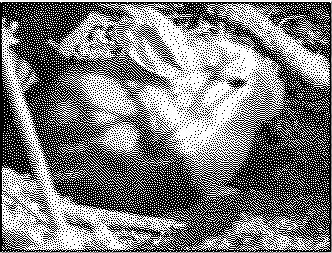

In [23]:
Image.fromarray(gray1.astype(np.uint8))

In [24]:
vec.shape

(506, 664, 2)

In [25]:
%load_ext autoreload
%autoreload 2

In [26]:
from gabor_pyramid import *
from time import time

In [27]:
st = time()
vecs_g = get_gabor_vectors(img_gray, norm=True)
end = time()
print("get_gabor_vectors took", end - st)
# print(vecs_g)

D:\Junk\dip\accentuated-art\src\gabor_pyramid.py:28: RuntimeWarning: divide by zero encountered in true_divide
  g_kernel /= 1.5*g_kernel.sum()


get_gabor_vectors took 1.105046033859253


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

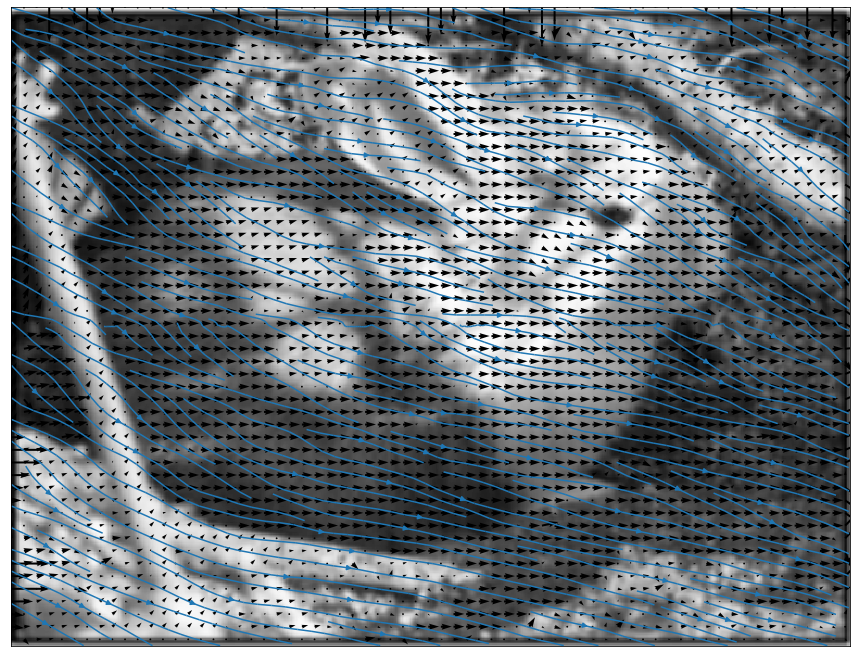

In [28]:
plt.clf()
figure = plt.figure(figsize=(12,12))
# plt.set_cmap(matplotlib.colors.Colormap('Accent'))
plt.set_cmap('gray')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(img_gray)
X, Y = np.meshgrid(np.arange(img_gray.shape[1]), np.arange(img_gray.shape[0]))
skip = 10
plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
plt.streamplot(X, Y, vecs_g[:, :, 1], vecs_g[:, :, 0], density=(2, 2))
# plt.streamplot(X, Y, vec_gggg[:, :, 1], vec_gggg[:, :, 0], density=(2, 2))
plt.tight_layout()

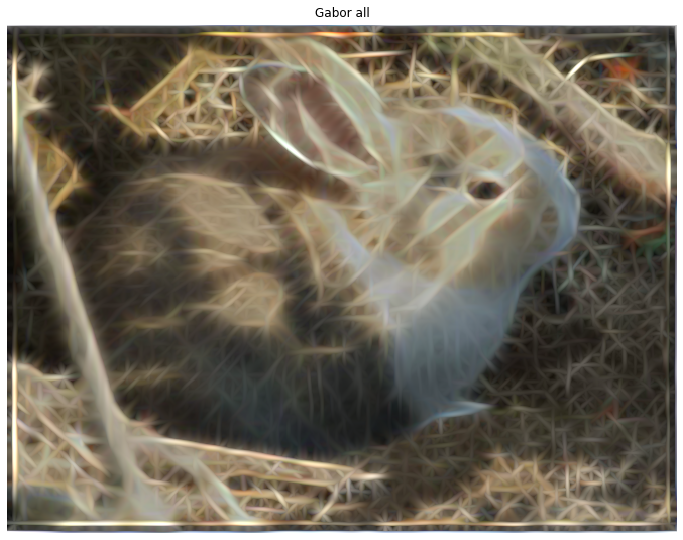

In [29]:
angles = []
for theta in np.arange(0, np.pi, np.pi / 4):
    angles.append(theta)
out, fin = gabor_pyramid(img, angles)
plt.figure(figsize=(12,12))
# cv2.imwrite("../images/out.png", fin)
show_img(fin)
plt.title("Gabor all")
plt.show()

In [30]:
img.shape

(506, 664, 3)

In [31]:
from draw_map import get_dmap
# img = cv.imread(test_img)
# img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

saliency_map, binarized_map, salient_region, out = get_dmap(
    img, saliency_met=0)

In [32]:
# Image.fromarray((out * 255).astype(np.uint8))

In [33]:
vec_dmap = vec_field_dmap(img_gray, labels, label_counts, out, 0.3 * out.max())

In [34]:
vec_dmap.shape

(506, 664, 2)

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

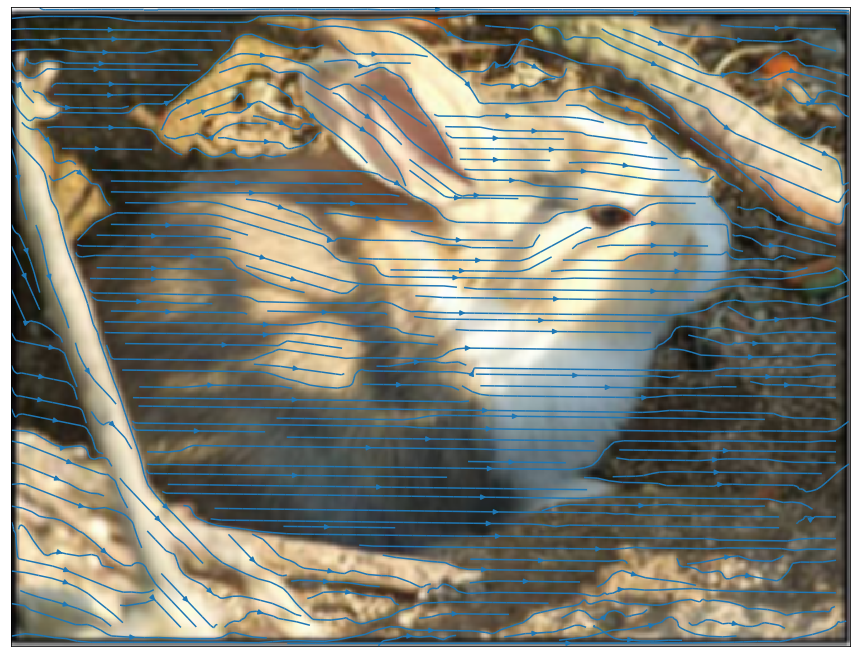

In [35]:
plt.clf()
figure = plt.figure(figsize=(12,12))
# plt.set_cmap(matplotlib.colors.Colormap('Accent'))
# plt.set_cmap('jet')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(img)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
# plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
plt.streamplot(X, Y, vec_dmap[:, :, 1], vec_dmap[:, :, 0], density=(2, 2))
# plt.streamplot(X, Y, vec_gggg[:, :, 1], vec_gggg[:, :, 0], density=(2, 2))
plt.tight_layout()

In [52]:
# vp.line_integral_convolution()
u, v = vecs_g[..., 0], vecs_g[..., 1]
u = u.astype(np.float32)
v = v.astype(np.float32)

In [53]:
data = vp.line_integral_convolution(v, u, im_noise_f, kernel)

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


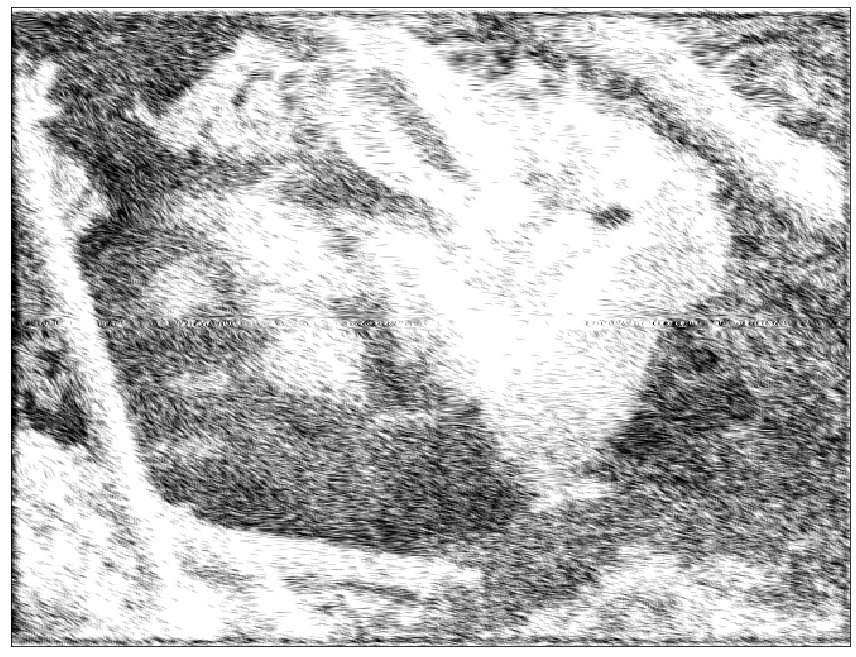

In [54]:
figure = plt.figure(figsize=(12,12))
plt.set_cmap('gray')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(data)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
#plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
# plt.streamplot(X, Y, vec[:, :, 1], vec[:, :, 0], density=(2, 2))
plt.tight_layout()

In [39]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    plt.imshow(labeled_img)

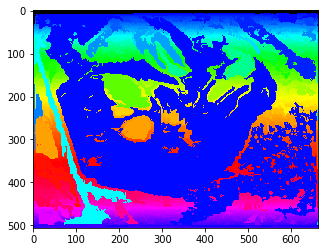

In [40]:
imshow_components(labels)

In [41]:
vec_c = vec.copy()
vec_c[vec_dmap != vec_c] = 0

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

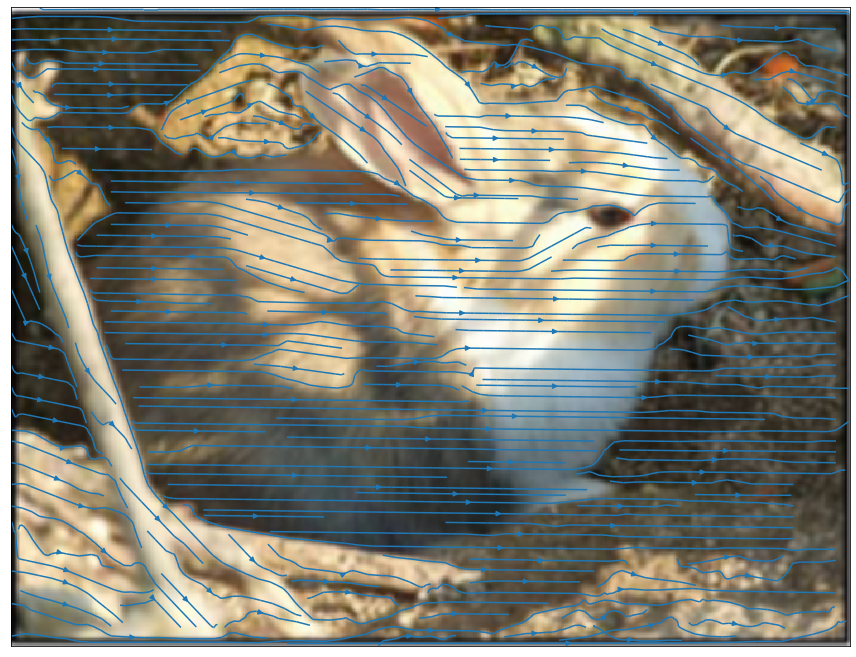

In [42]:
plt.clf()
figure = plt.figure(figsize=(12,12))
# plt.set_cmap(matplotlib.colors.Colormap('Accent'))
# plt.set_cmap('jet')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.imshow(img)
X, Y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
skip = 10
# plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], vec[::skip, ::skip, 1], vec[::skip, ::skip, 0])
plt.streamplot(X, Y, vec_c[:, :, 1], vec_c[:, :, 0], density=(2, 2))
# plt.streamplot(X, Y, vec_gggg[:, :, 1], vec_gggg[:, :, 0], density=(2, 2))
plt.tight_layout()

In [43]:
im_col = cv2.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
# im_col = cv.resize(im_col, (300, 300))

In [44]:
im_col.shape

(506, 664, 3)

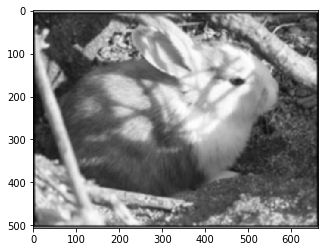

In [45]:
plt.imshow(im_col)

In [46]:
from multi_res import *

In [47]:
mul_res = get_mr_img_from_rgb_img(im_col)

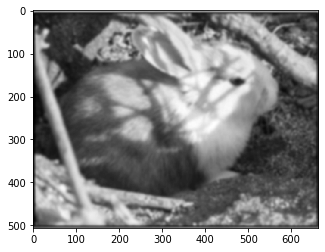

In [48]:
plt.imshow(mul_res, cmap='gray')

In [49]:
# lic = line_integral_convolution(im_noise, vec, KW=10, use_tqdm=True)

In [50]:
# figure = plt.figure(figsize=(12,12))
# plt.set_cmap('gray')
# plt.imshow(lic)
# plt.axes().get_xaxis().set_visible(False)
# plt.axes().get_yaxis().set_visible(False)
# plt.tight_layout()

In [78]:
from PIL import Image
img = Image.open('../images/temp.jpeg', 'r').convert('L')
img_w, img_h = img.size
background = Image.open('paper.jpg', 'r').convert('L')
bg_w, bg_h = background.size
img_na = np.array(img)
bg_na = np.array(background)

In [101]:
from edge import *
from blend import composite_paper

In [80]:
_, _, edg = get_edge_img(img_na, 190)
edg_na = edg.astype(np.uint8)

254.9999999999999 10.200000000000001


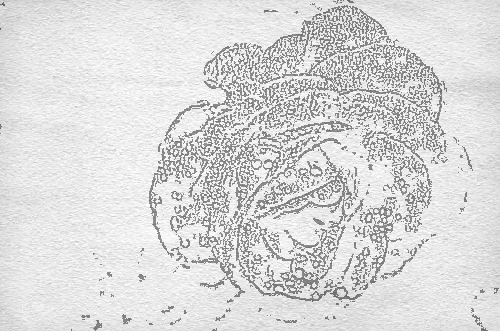

In [102]:
composite_paper(edg_na, bg_na)